In [1]:
# importing modules and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing

In [2]:
import pandas as pd
from sqlalchemy import create_engine

# Replace the following with your database configuration
db_config = {
   "dbname": "postgres",
    "user": "postgres",
    "password": "finalproject",
    "host": "database-1.cxqtmtcu0z5m.us-east-1.rds.amazonaws.com",
    "port": "5432"  # Default is 5432 for PostgreSQL
}

#Connect to the PostgreSQL database

engine = create_engine(f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['dbname']}")

#Load data from the ev_registration_giga table into a pandas DataFrame
query = "SELECT * FROM ev_registration_gigas;"
df1 = pd.read_sql_query(query, engine)

In [3]:
print(df1.head())
print(df1.columns)

  state  year  electric_ev  plug_in_hybrid_electric_phev  \
0    ID  2021       3500.0                        2500.0   
1    IL  2021      36500.0                       18300.0   
2    IN  2021      10400.0                        7500.0   
3    IA  2021       3700.0                        3600.0   
4    KS  2021       4500.0                        3300.0   

   charging_station_count  income  education  population  non_ev_total  \
0                   282.0   76918      0.307     1904314       1875700   
1                  1792.0   79253      0.371    12686469       9913300   
2                   606.0   70190      0.289     6813532       6018200   
3                   492.0   72429      0.305     3197689       3043800   
4                   910.0   75979      0.354     2937922       2565100   

   ev_total  
0      6000  
1     54800  
2     17900  
3      7300  
4      7800  
Index(['state', 'year', 'electric_ev', 'plug_in_hybrid_electric_phev',
       'charging_station_count', 'incom

In [4]:
df = df1.drop(['state', 'electric_ev', 'plug_in_hybrid_electric_phev'], axis= 1)
print(df)

     year  charging_station_count  income  education  population  \
0    2021                   282.0   76918      0.307     1904314   
1    2021                  1792.0   79253      0.371    12686469   
2    2021                   606.0   70190      0.289     6813532   
3    2021                   492.0   72429      0.305     3197689   
4    2021                   910.0   75979      0.354     2937922   
..    ...                     ...     ...        ...         ...   
301  2016                    66.0   46836      0.208     1831023   
302  2016                   258.0   69943      0.295     5772628   
303  2016                    52.0   71052      0.271      584215   
304  2016                     0.0   68882      0.296      754434   
305  2016                     0.0   73893      0.289      862996   

     non_ev_total  ev_total  
0         1875700      6000  
1         9913300     54800  
2         6018200     17900  
3         3043800      7300  
4         2565100      7800  
.. 

In [5]:
X = df.drop('charging_station_count',axis= 1)
y = df['charging_station_count']
print(X)
print(y)

     year  income  education  population  non_ev_total  ev_total
0    2021   76918      0.307     1904314       1875700      6000
1    2021   79253      0.371    12686469       9913300     54800
2    2021   70190      0.289     6813532       6018200     17900
3    2021   72429      0.305     3197689       3043800      7300
4    2021   75979      0.354     2937922       2565100      7800
..    ...     ...        ...         ...           ...       ...
301  2016   46836      0.208     1831023       1502400       400
302  2016   69943      0.295     5772628       5310200      5200
303  2016   71052      0.271      584215        591200       200
304  2016   68882      0.296      754434        745200       100
305  2016   73893      0.289      862996        847500       300

[306 rows x 6 columns]
0       282.0
1      1792.0
2       606.0
3       492.0
4       910.0
        ...  
301      66.0
302     258.0
303      52.0
304       0.0
305       0.0
Name: charging_station_count, Length: 306,

In [6]:
# creating train and test sets
#X_train, X_test, y_train, y_test = train_test_split(
#    X, y, shuffle = True)

train_index = X.year==2021
X_train = X.loc[~train_index]
X_test = X.loc[train_index]
y_train = y.loc[~train_index]
y_test = y.loc[train_index]

In [7]:
# creating a regression model
model = LinearRegression()

In [8]:
# fitting the model
model.fit(X_train,y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8749101272942907
Testing Score: 0.6260192606608335


In [9]:
x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f'Min X Value: {x_min}')
print(f'Max X Value: {x_max}')

Min X Value: [[[2.0160e+03 4.6159e+04 2.0200e-01 0.0000e+00 3.1070e+05 1.0000e+02]]]
Max X Value: [[[2.0210000e+03 1.0128300e+05 6.3600000e-01 3.9512223e+07 3.4111700e+07
   8.7840000e+05]]]


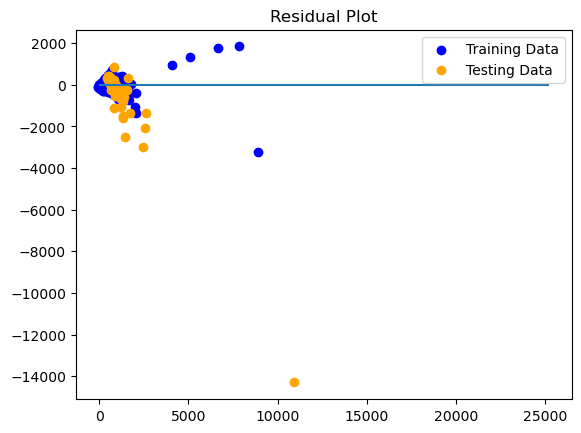

In [10]:
#plot residuals

plt.scatter(model.predict(X_train), model.predict(X_train)-y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test)-y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
plt.show()

In [11]:
# making predictions
predictions = model.predict(X_test)
print(predictions)

[  549.68181424  1524.95623382   814.37971739   601.52664885
   663.60890486   625.29474565   613.28619579   620.46180743
  1212.33005153  1413.09891729  1149.85932231   943.49090904
   504.94229444   822.30035821   556.80184552   579.77929942
   775.24106581   650.16202083  1600.60407318   588.28887507
  2463.23497174  1243.8062285    485.1308376   1163.96177483
   660.5929107   1125.89303186  1404.17131621   595.47105541
   729.97819348   489.04975107   848.64244458  2600.69730555
   854.09157327   681.97408829  1312.13892755  1717.57319571
   469.26103469   804.10182201   451.91372811   639.78797785
   505.11394951  1279.36621874   533.98935402 10933.2354842
  1315.48302979   926.85510156   583.34187128  2559.54535072
  1328.12851937   840.67306172   738.03445837]


In [12]:
# model evaluation
print(
  'mean_squared_error : ', mean_squared_error(y_test, predictions))
print(
  'mean_absolute_error : ', mean_absolute_error(y_test, predictions))

mean_squared_error :  4709182.604144309
mean_absolute_error :  821.7638589782542


In [15]:
pre = [549.68181424,  1524.95623382,   814.37971739,   601.52664885,
   663.60890486,   625.29474565,   613.28619579,   620.46180743,
  1212.33005153,  1413.09891729,  1149.85932231,   943.49090904,
   504.94229444,   822.30035821,   556.80184552,   579.77929942,
   775.24106581,   650.16202083,  1600.60407318,  588.28887507,
  2463.23497174,  1243.8062285,    485.1308376 ,  1163.96177483,
   660.5929107,   1125.89303186,  1404.17131621,   595.47105541,
   729.97819348,   489.04975107,   848.64244458,  2600.69730555,
   854.09157327,   681.97408829,  1312.13892755,  1717.57319571,
   469.26103469,   804.10182201,   451.91372811,   639.78797785,
   505.11394951,  1279.36621874,   533.98935402, 10933.2354842,
  1315.48302979,   926.85510156,   583.34187128,  2559.54535072,
  1328.12851937,   840.67306172,   738.03445837]

In [16]:
df_pre = pd.DataFrame(pre)


In [18]:
df_pre.to_csv("CS_Predictions")